In [1]:
%matplotlib inline
from pycalphad import Database, binplot
import pycalphad.variables as v
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')

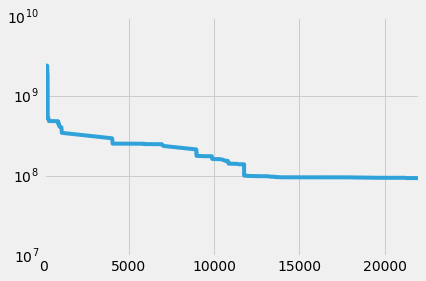

In [2]:
import pandas as pd
import numpy as np
from collections import OrderedDict
from sympy import Symbol
iterations = pd.read_csv('alni-1484090663.csv')
progress_indices = []
progress_params = []
smallest_error = np.inf
symbols = list(map(Symbol, iterations.columns.values[2:]))
for idx, error in enumerate(np.array(iterations['error'])):
    if error < smallest_error:
        progress_indices.append(idx)
        smallest_error = error
        # skip error, time
        param_dict = OrderedDict(zip(symbols, iterations.loc[idx, iterations.columns.values[2:]]))
        progress_params.append(param_dict)
iterations['error'][progress_indices].plot(logy=True)

In [3]:
from paramselect import load_datasets, multi_plot
import os
import fnmatch
from pycalphad import Database, Model
from pycalphad.core.sympydiff_utils import build_functions

def recursive_glob(start, pattern):
    matches = []
    for root, dirnames, filenames in os.walk(start):
        for filename in fnmatch.filter(filenames, pattern):
            matches.append(os.path.join(root, filename))
    return matches

datasets = load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
dbf = Database('alni.tdb')
comps = ['AL', 'NI', 'VA']
callable_dict = {}
grad_callable_dict = {}
hess_callable_dict = {}
models = {}
for sym in symbols:
    dbf.symbols.pop(str(sym))
for name in dbf.phases.keys():
    models[name] = Model(dbf, comps, name)
    mod = models[name]
    site_fracs = mod.site_fractions
    out = models[name].energy
    if (not callable_dict.get(name, False)) or not (grad_callable_dict.get(name, False)) \
            or (not hess_callable_dict.get(name, False)):
        # Only force undefineds to zero if we're not overriding them
        undefs = list(out.atoms(Symbol) - out.atoms(v.StateVariable) - set(symbols))
        for undef in undefs:
            out = out.xreplace({undef: float(0)})
        cf, gf, hf = build_functions(out, tuple([v.P, v.T] + site_fracs), parameters=symbols)
        if callable_dict.get(name, None) is None:
            callable_dict[name] = cf
        if grad_callable_dict.get(name, None) is None:
            grad_callable_dict[name] = gf
        if hess_callable_dict.get(name, None) is None:
            hess_callable_dict[name] = hf

Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1290.0)), ('X_NI', array(0.320001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1440.0)), ('X_NI', array(0.740001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1470.0)), ('X_NI', array(0.740001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(570.0)), ('X_NI', array(0.500001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1440.0)), ('X_NI', array(0.740001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1470.0)), ('X_NI', array(0.740001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(750.0)), ('X_NI', array(0.500001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1500.0)), ('X_NI', array(0.760001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1530.0)), ('X_NI', array(0.760001))])
Failed to converge: OrderedDict([('P', 

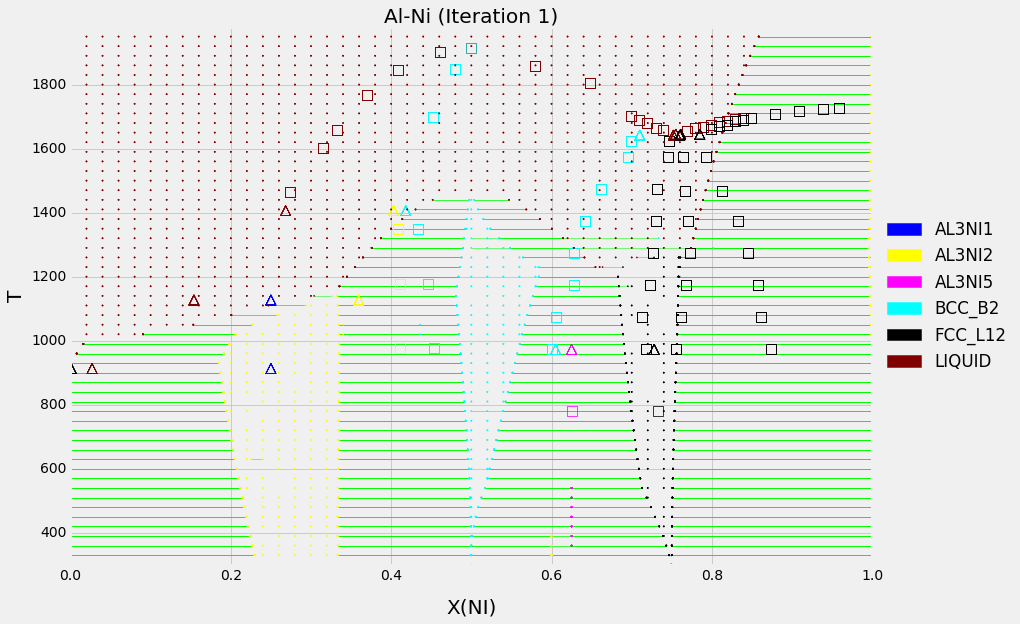

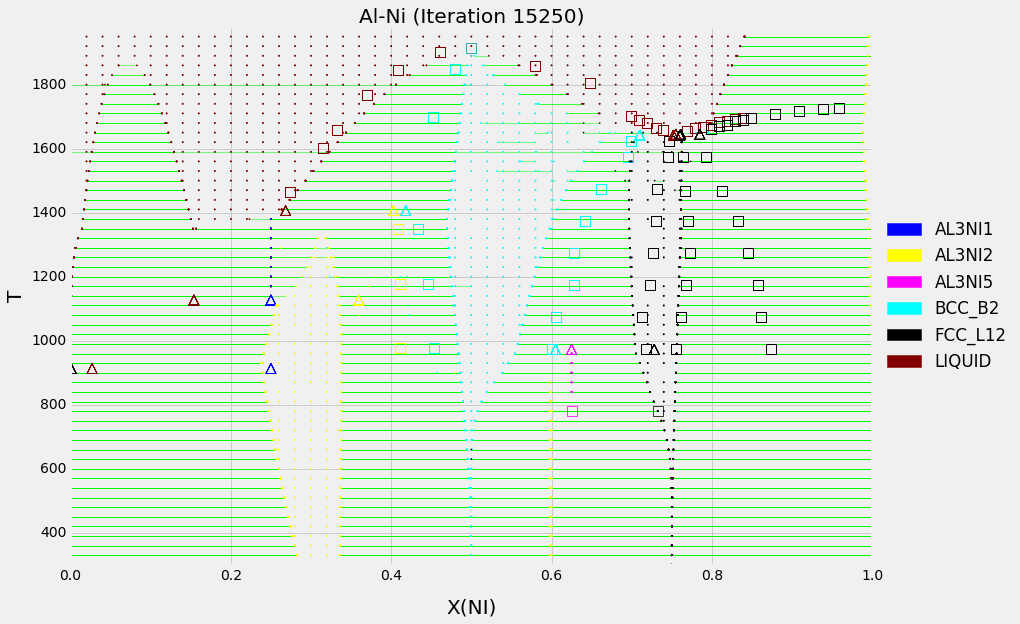

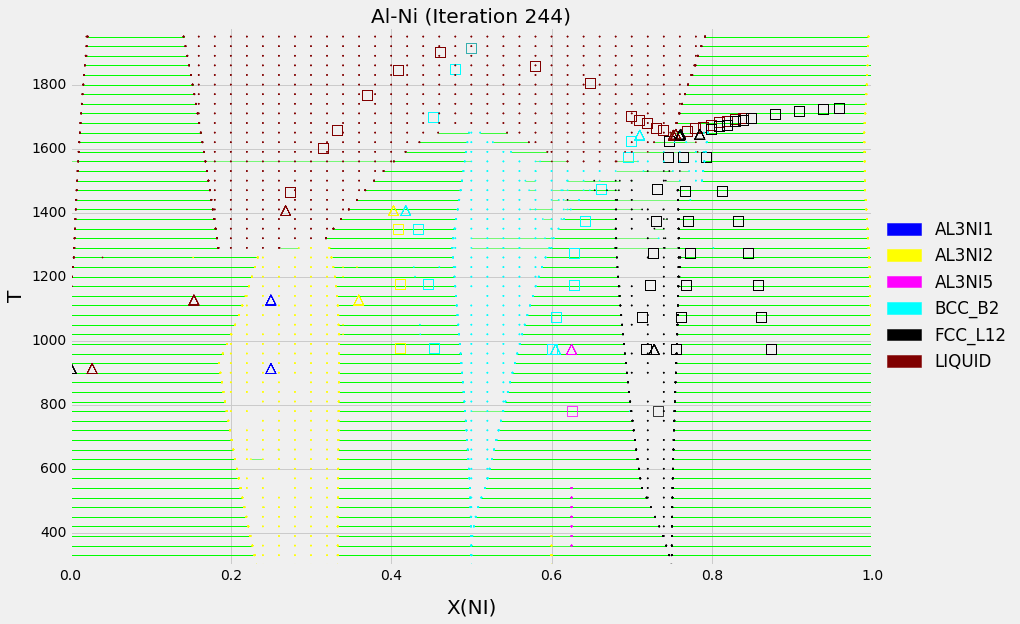

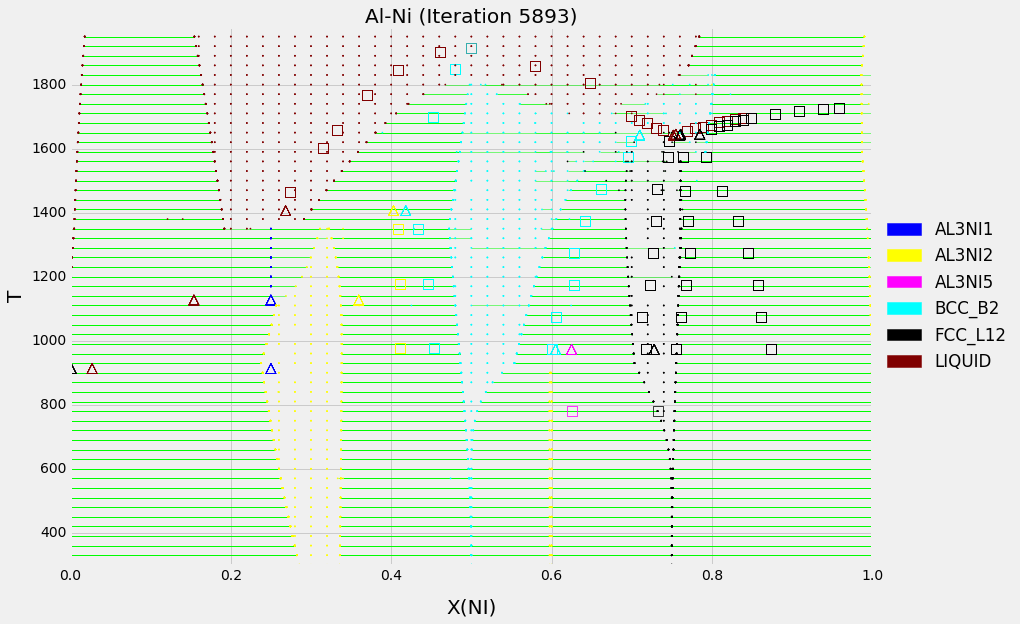

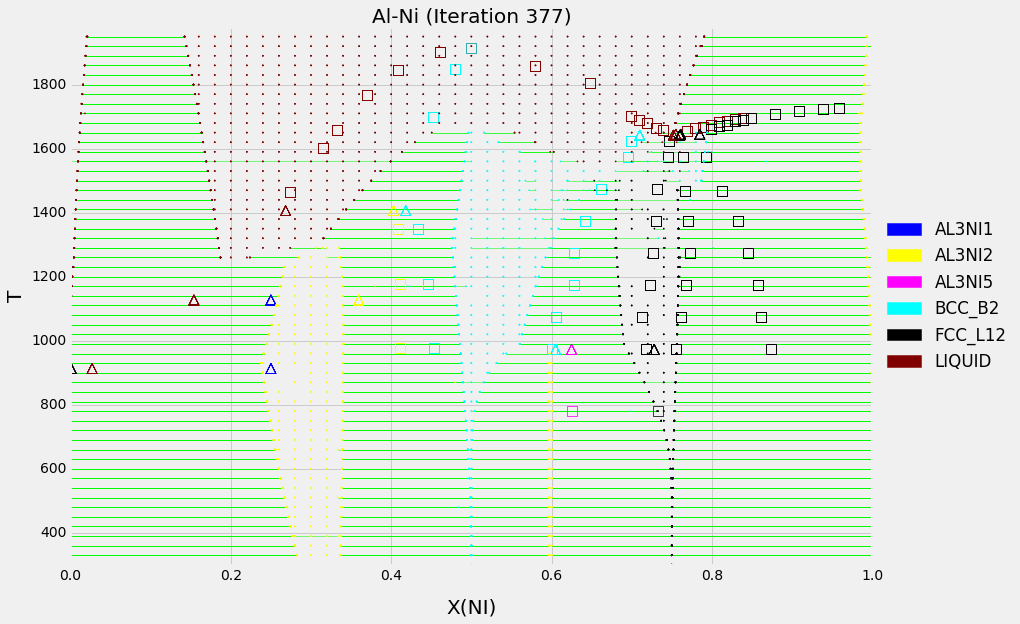

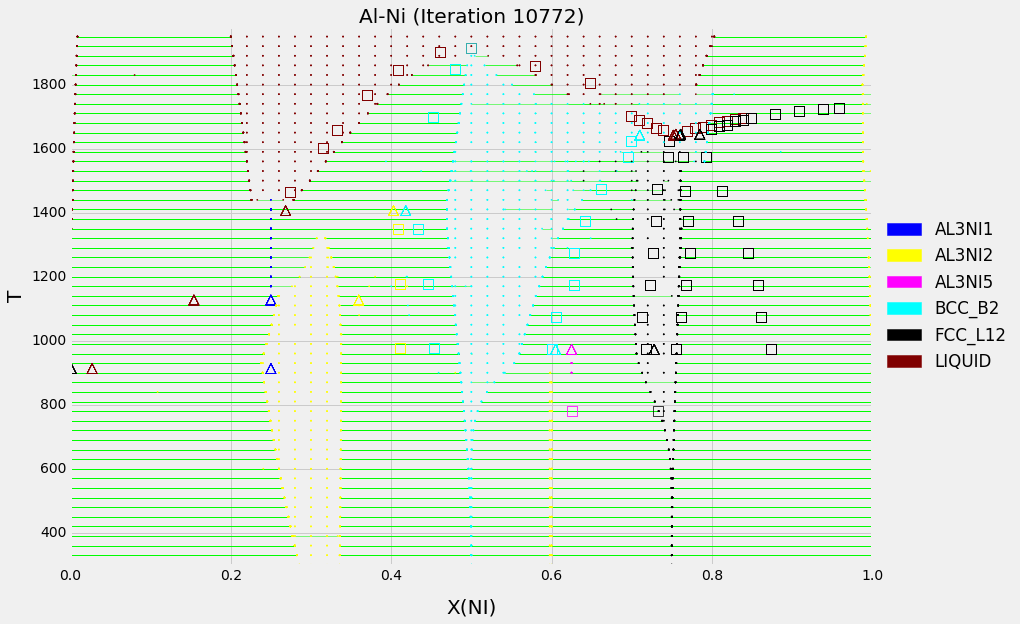

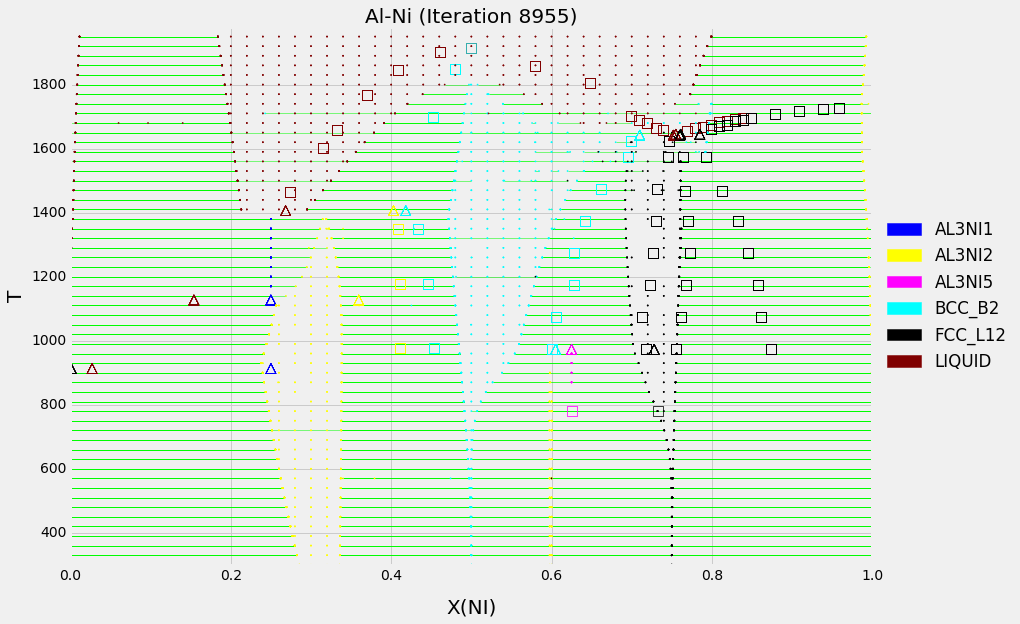

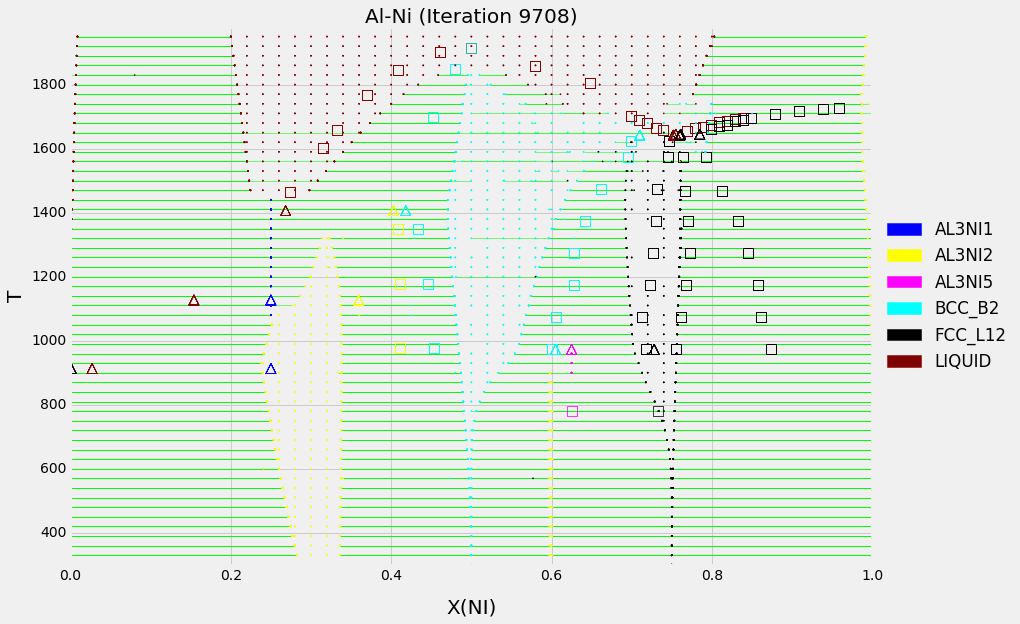

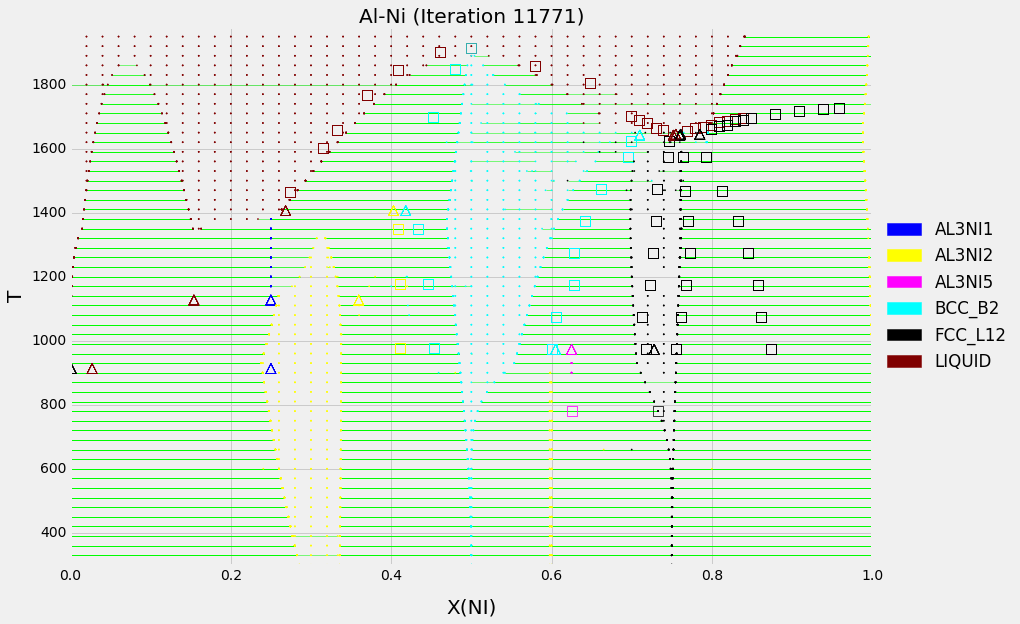

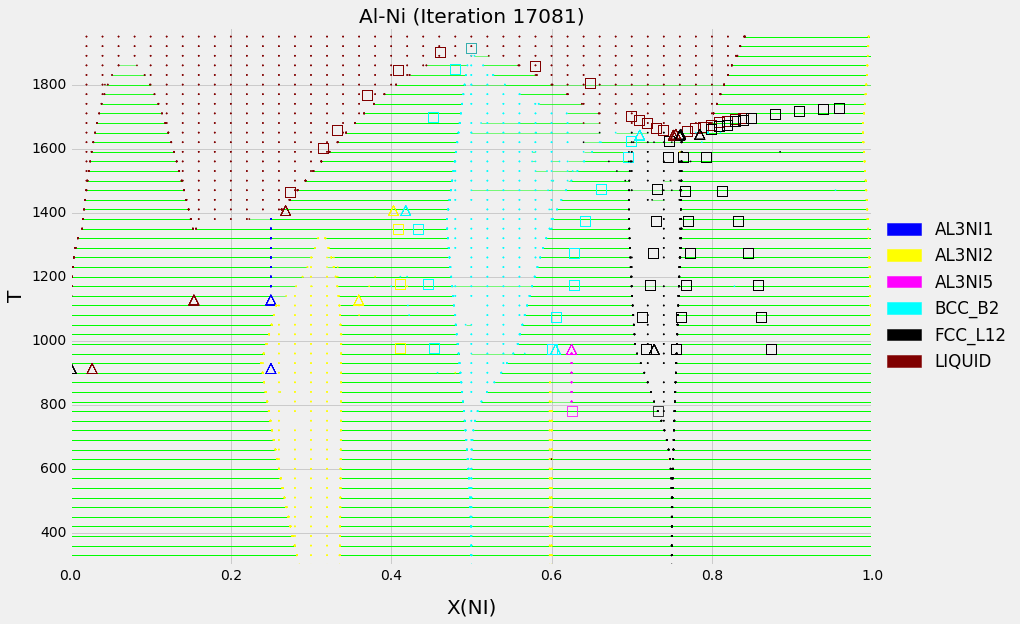

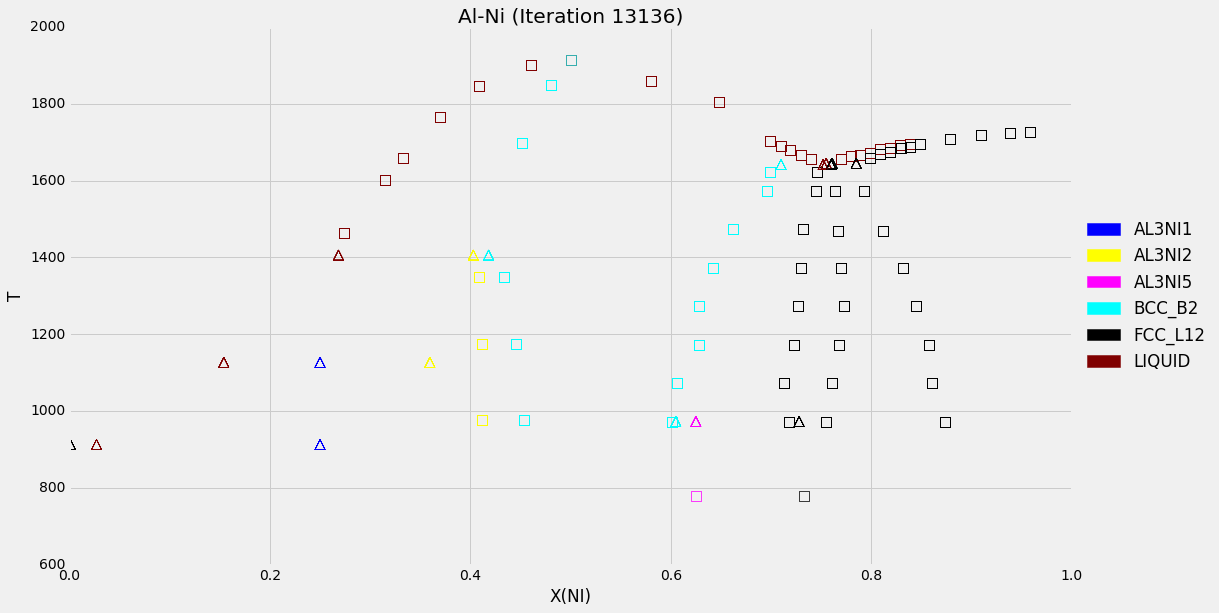

In [7]:
for idx, param_dict in zip(progress_indices[::30], progress_params[::30]):
    fig = plt.figure(idx, figsize=(16,9))
    try:
        binplot(dbf, ['AL', 'NI', 'VA'], sorted(dbf.phases.keys()),
                {v.P: 101325, v.T: (300, 2000, 30), v.X('NI'): (1e-6,1,0.02)}, ax=fig.gca(),
                eq_kwargs={'parameters': param_dict, 'model': models,
                           'callables': callable_dict, 'grad_callables': grad_callable_dict,
                           'hess_callables': hess_callable_dict})
    except ValueError as e:
        print(e)
    multi_plot(dbf, ['AL', 'NI', 'VA'], sorted(dbf.phases.keys()), datasets, ax=fig.gca())
    fig.gca().set_title('Al-Ni (Iteration {})'.format(idx+1))
    #fig.savefig('alni.png'.format(i), dpi=fig.dpi)

In [16]:
iterations.loc[12000, iterations.columns.values[2:]] - iterations.loc[0, iterations.columns.values[2:]]

VV0000   -6.217282e+02
VV0001   -1.007898e-03
VV0002   -3.246711e+00
VV0003    5.695395e-02
VV0004    7.499541e+03
VV0005    7.446605e-01
VV0006   -2.164236e+04
VV0007   -1.243894e+00
VV0008   -1.255025e+00
VV0009    6.930614e-01
VV0010   -4.945250e-02
VV0011    1.909830e-01
VV0012   -2.257730e-08
VV0013    1.173644e-08
VV0014    0.000000e+00
VV0015   -8.213918e-02
VV0016   -1.354817e-06
VV0017    0.000000e+00
VV0018   -1.316948e-09
VV0019   -1.003258e-09
VV0020    0.000000e+00
VV0021    1.818989e-11
VV0022   -2.143399e+03
VV0023    1.101442e-03
VV0024    1.000000e+00
VV0025   -2.040077e-05
VV0026   -2.800334e-04
VV0027   -3.079828e-09
VV0028    1.770081e-08
VV0029   -6.388504e-01
              ...     
VV0037   -6.548362e-11
VV0038    0.000000e+00
VV0039    0.000000e+00
VV0040   -1.029339e-01
VV0041    2.000000e+00
VV0042   -2.360680e-01
VV0043    7.275958e-12
VV0044    3.900966e-01
VV0045   -2.035704e-01
VV0046   -1.379515e-05
VV0047   -2.180332e-04
VV0048   -1.509422e-07
VV0049   -4